Run Siamese model relavant function

Training triplets


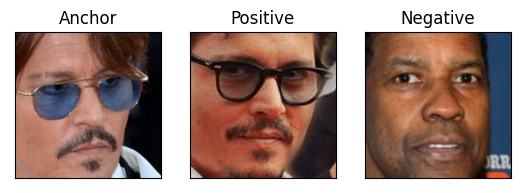

Validation triplets


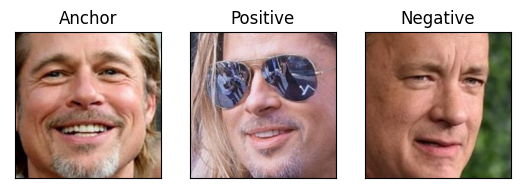

Testing triplets


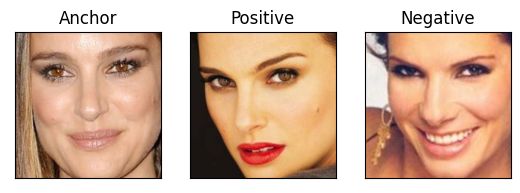

NameError: name 'stops' is not defined

NameError: name 'stops' is not defined

In [1]:
%run Siamese_Model.ipynb

Detect and Extract human faces

In [2]:
%run Face_Detection.ipynb

There are 0 faces not being detected
There are 3 faces being detected and saved
There are 0 images detected multiple faces


Encode and load new unseen data

In [3]:
new_le = LabelEncoder()
images,labels = load_data('preprocessed_Dataset',augmentation=True)
numlabels = new_le.fit_transform(labels)

Turn new data into triplets

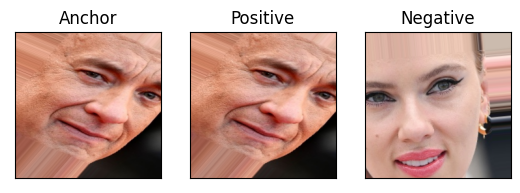

In [4]:
anchor,positive,negative = make_triplets(images,numlabels)
display_triplets(anchor,positive,negative)

Embed triplets

In [5]:
# Load the model 
model = keras.models.load_model("embedding_model",compile=False)
pos,neg,embedded_anchor,embedded_positive,embedded_negative  = model.predict((anchor,positive,negative))

1/1 [==============================] - 9s 9s/step


Classify embedded triplets and display

Expected : Denzel Washington
Predicted: Denzel Washington


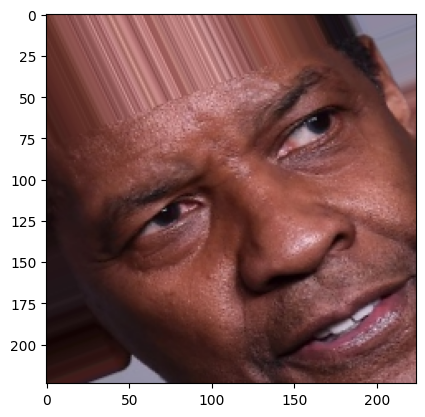

Expected : Denzel Washington
Predicted: Denzel Washington


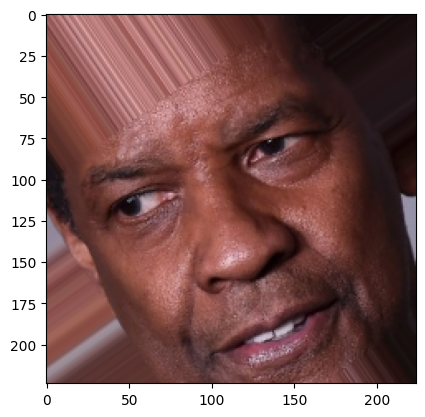

Expected : Denzel Washington
Predicted: Denzel Washington


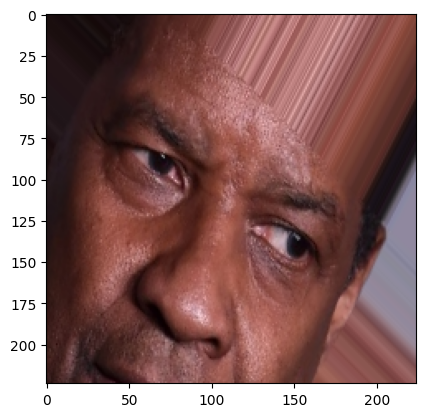

Expected : Denzel Washington
Predicted: Denzel Washington


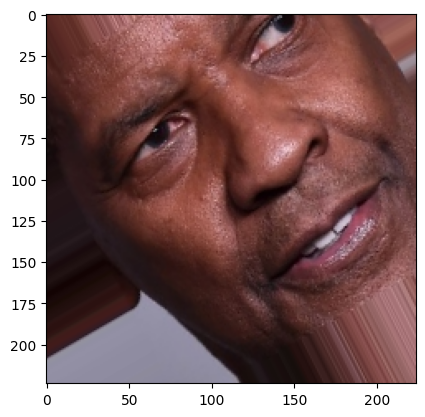

Expected : Denzel Washington
Predicted: Denzel Washington


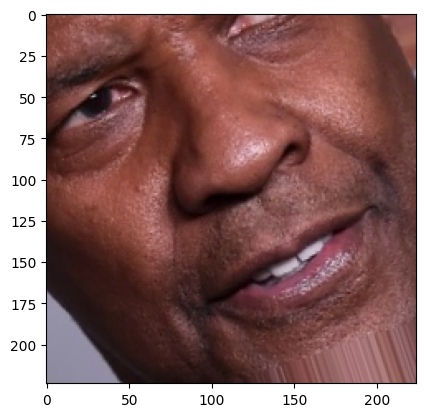

Expected : Scarlett Johansson
Predicted: Natalie Portman


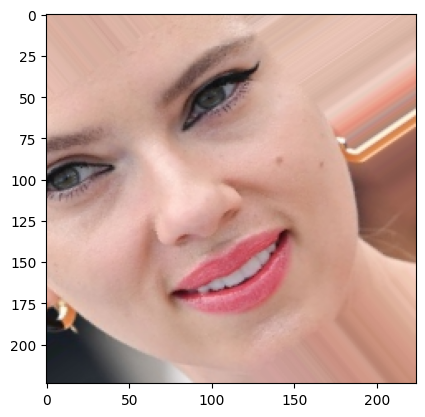

Expected : Scarlett Johansson
Predicted: Scarlett Johansson


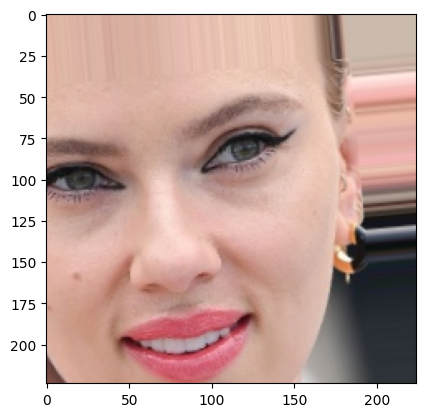

Expected : Scarlett Johansson
Predicted: Natalie Portman


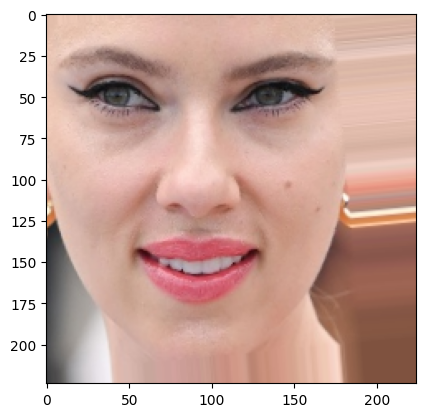

Expected : Scarlett Johansson
Predicted: Nicole Kidman


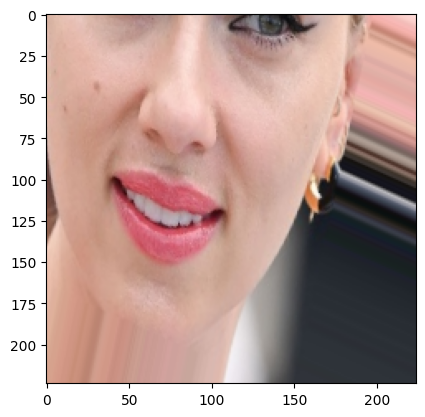

Expected : Scarlett Johansson
Predicted: Scarlett Johansson


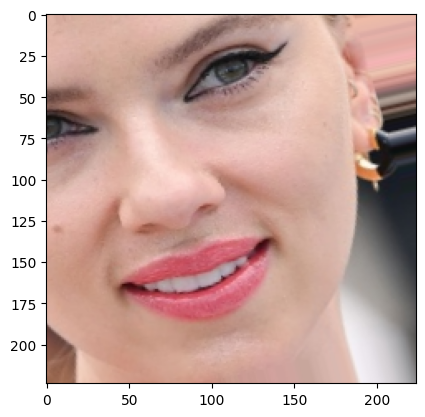

Expected : Tom Hanks
Predicted: Tom Hanks


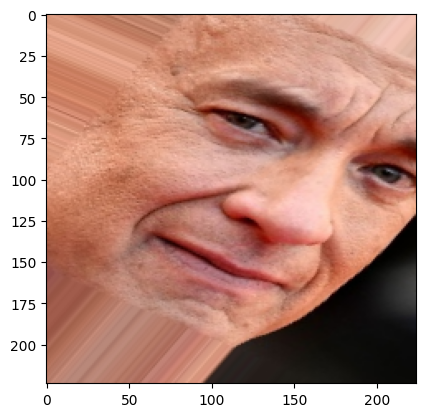

Expected : Tom Hanks
Predicted: Brad Pitt


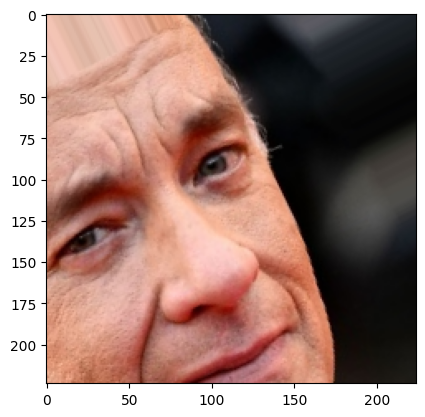

Expected : Tom Hanks
Predicted: Tom Hanks


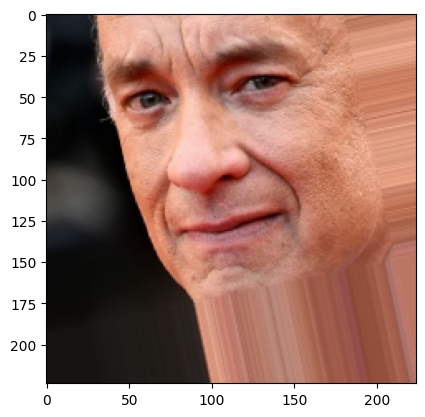

Expected : Tom Hanks
Predicted: Tom Hanks


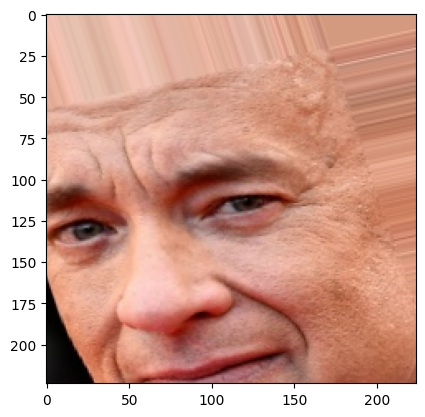

Expected : Tom Hanks
Predicted: Johnny Depp


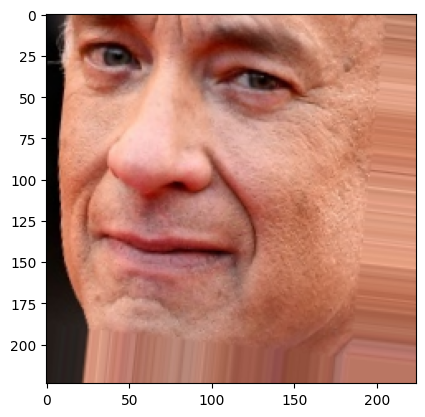

In [6]:
filename = 'classification_model.sav'
knn = pickle.load(open(filename, 'rb'))
num_pred = knn.predict(np.concatenate((embedded_anchor,embedded_positive)))
name_pred = le.inverse_transform(num_pred)
for i in np.arange(embedded_anchor.shape[0]):
    print("Expected :",labels[i])
    print("Predicted:",name_pred[i])
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.show()

In [8]:
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.decomposition import PCA

# Assuming 'embedded_anchor', 'labels', and 'create_embedding_model' are defined

# Calculate PCA embeddings for the first dataset
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embedded_anchor)

# Create the untrained model and calculate PCA embeddings for the second dataset
untrained_model = create_embedding_model((224,224,3))
untrained_anchor = untrained_model.predict(anchor)
pca = PCA(n_components=2)
untrained_embeddings = pca.fit_transform(untrained_anchor)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("PCA Embeddings (Trained)", "PCA Embeddings (Untrained)"))

# Add scatter plots to subplots
scatter_trained = px.scatter(x=pca_embeddings[:, 0], y=pca_embeddings[:, 1], color=labels)
scatter_untrained = px.scatter(x=untrained_embeddings[:, 0], y=untrained_embeddings[:, 1], color=labels)

for trace in scatter_trained['data']:
    fig.add_trace(trace, row=1, col=1)

for trace in scatter_untrained['data']:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(
    title="Embedding Space Visualization",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
    showlegend=False
)

fig.show()

1/1 [==============================] - 2s 2s/step
